<a href="https://colab.research.google.com/github/mdayanabbas/Fake-News-Detection/blob/main/1601_21_771_302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q1. Perform Merge and join operations by combining data from the below mentioned sources and draw meaningful insights**

In [2]:
import pandas as pd

In [ ]:
abbrevs = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-abbrevs.csv')
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
population = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv')
population.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


**Changing the column name to make a common name among the datasets**

In [ ]:
population.rename(columns = {'state/region':'abbreviation'}, inplace = True)
population.head()

,abbreviation,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [ ]:
area= pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv')
area.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [ ]:
merged_df = pd.merge(abbrevs, population, on='abbreviation', how='inner')
merged_df.head()

,state,abbreviation,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0


In [ ]:
second_merge= pd.merge(merged_df,area, on='state', how='inner')
second_merge

,state,abbreviation,ages,year,population,area (sq. mi)
0,Alabama,AL,under18,2012,1117489.0,52423
1,Alabama,AL,total,2012,4817528.0,52423
2,Alabama,AL,under18,2010,1130966.0,52423
3,Alabama,AL,total,2010,4785570.0,52423
4,Alabama,AL,under18,2011,1125763.0,52423
...,...,...,...,...,...,...
2443,Wyoming,WY,under18,1993,137458.0,97818
2444,Wyoming,WY,total,1991,459260.0,97818
2445,Wyoming,WY,under18,1991,136720.0,97818
2446,Wyoming,WY,under18,1990,136078.0,97818


In [ ]:
second_merge.columns

Index(['state', 'abbreviation', 'ages', 'year', 'population', 'area (sq. mi)'], dtype='object')

In [ ]:

yearly_stats = second_merge.groupby('year').agg({'population': 'sum'})
print("\nYearly population statistics:")
print(yearly_stats)


Yearly population statistics:
       population
year             
1990  313841326.0
1991  318293960.0
1992  323023408.0
1993  327513533.0
1994  331766762.0
1995  335751543.0
1996  339627803.0
1997  343567670.0
1998  347285522.0
1999  350986232.0
2000  354538600.0
2001  357640130.0
2002  360561650.0
2003  363208691.0
2004  366103033.0
2005  369040268.0
2006  372137626.0
2007  375250612.0
2008  378198568.0
2009  380905696.0
2010  383445851.0
2011  385484786.0
2012  387581864.0
2013  389714711.0


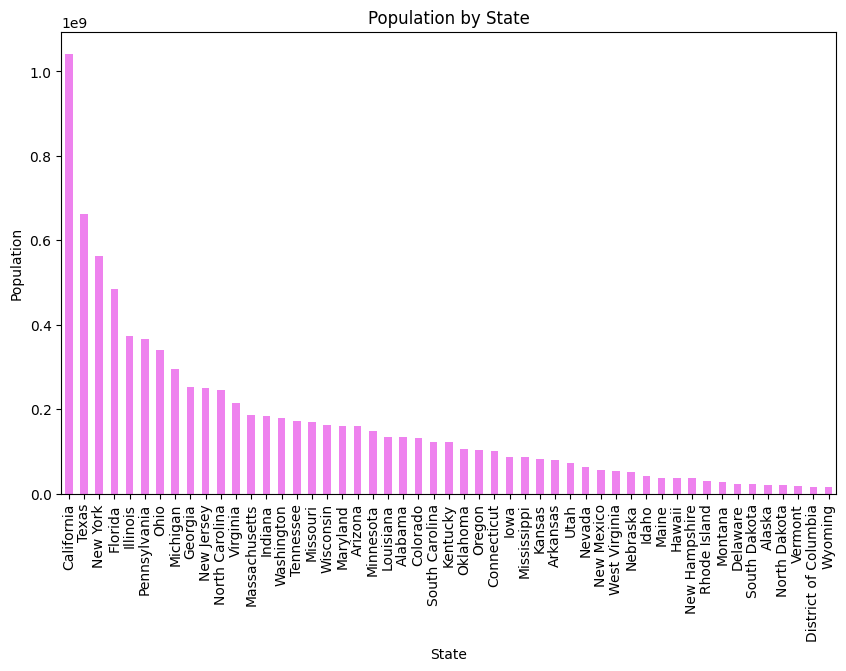

In [ ]:

import matplotlib.pyplot as plt

second_merge.groupby('state')['population'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6), color='violet')
plt.title("Population by State")
plt.xlabel("State")
plt.ylabel("Population")
plt.show()

#**Q2.Perform Time-shifting, Windowing and Resampling on the following Data sets**

**fremont-bridge-hourly-bicycle-counts-by-month-october-2012-to-present dataset**

In [ ]:

data = pd.read_csv("/content/fremont-bridge-hourly-bicycle-counts-by-month-october-2012-to-present.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Fremont Bridge Total Shifted'] = data['Fremont Bridge Total'].shift(1)
data['Fremont Bridge Total Shifted']

Date
2012-10-03 00:00:00      NaN
2012-10-03 01:00:00     13.0
2012-10-03 02:00:00     10.0
2012-10-03 03:00:00      2.0
2012-10-03 04:00:00      5.0
                       ...  
2019-10-31 19:00:00    305.0
2019-10-31 20:00:00    111.0
2019-10-31 21:00:00     52.0
2019-10-31 22:00:00     41.0
2019-10-31 23:00:00     32.0
Name: Fremont Bridge Total Shifted, Length: 62040, dtype: float64

In [ ]:

data['Fremont Bridge Total MA 7'] = data['Fremont Bridge Total'].rolling(window=7).mean()
data['Fremont Bridge Total MA 7']

Date
2012-10-03 00:00:00           NaN
2012-10-03 01:00:00           NaN
2012-10-03 02:00:00           NaN
2012-10-03 03:00:00           NaN
2012-10-03 04:00:00           NaN
                          ...    
2019-10-31 19:00:00    274.285714
2019-10-31 20:00:00    267.857143
2019-10-31 21:00:00    256.571429
2019-10-31 22:00:00    232.714286
2019-10-31 23:00:00    164.428571
Name: Fremont Bridge Total MA 7, Length: 62040, dtype: float64

In [ ]:
monthly_data = data.resample('M').sum()
monthly_data

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Fremont Bridge Total Shifted,Fremont Bridge Total MA 7
Date,,,,,
2012-10-31,65695.0,33764.0,31931.0,65677.0,65568.714286
2012-11-30,50647.0,26062.0,24585.0,50648.0,50671.142857
2012-12-31,36369.0,18608.0,17761.0,36374.0,36398.714286
2013-01-31,44884.0,22910.0,21974.0,44881.0,44794.714286
2013-02-28,50027.0,25898.0,24129.0,50031.0,50037.714286
...,...,...,...,...,...
2019-06-30,132512.0,51976.0,80536.0,132547.0,132664.285714
2019-07-31,137714.0,53166.0,84548.0,137687.0,137486.142857
2019-08-31,142414.0,52440.0,89974.0,142416.0,142657.142857


**all_stocks_5yr.csv**

In [ ]:

data = pd.read_csv('/content/all_stocks_5yr.csv')
data['date'] = pd.to_datetime(data['date'])
data['date']

0        2013-02-08
1        2013-02-11
2        2013-02-12
3        2013-02-13
4        2013-02-14
            ...    
619035   2018-02-01
619036   2018-02-02
619037   2018-02-05
619038   2018-02-06
619039   2018-02-07
Name: date, Length: 619040, dtype: datetime64[ns]

In [ ]:
data['close_ma_7'] = data['close'].rolling(window=7).mean()
print(data['close_ma_7'])

date
2013-02-08          NaN
2013-02-11          NaN
2013-02-12          NaN
2013-02-13          NaN
2013-02-14          NaN
                ...    
2018-02-01    78.535714
2018-02-02    78.314286
2018-02-05    77.540000
2018-02-06    76.565714
2018-02-07    75.805714
Name: close_ma_7, Length: 619040, dtype: float64


In [ ]:

weekly_data = data.resample('W').mean()
print(weekly_data)

                  open        high         low       close        volume  \
date                                                                       
2013-02-10   58.068730   58.659286   57.802352   58.368654  4.643484e+06   
2013-02-17   58.386280   58.833577   57.945612   58.414417  5.112946e+06   
2013-02-24   58.177193   58.641850   57.567703   58.068228  5.408867e+06   
2013-03-03   57.832404   58.486691   57.215522   57.827871  5.412355e+06   
2013-03-10   59.116788   59.623997   58.686228   59.249464  4.856800e+06   
...                ...         ...         ...         ...           ...   
2018-01-14  110.253504  111.287263  109.425013  110.558110  4.078885e+06   
2018-01-21  112.100092  113.047965  110.977412  111.986552  4.888104e+06   
2018-01-28  113.822966  114.897633  112.739720  114.078832  4.547839e+06   
2018-02-04  113.502741  114.629154  112.007409  112.941339  5.037919e+06   
2018-02-11  107.502277  110.134866  105.403882  107.514554  6.954559e+06   

           

<ipython-input-96-467de5df8341>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = data.resample('W').mean()


#**Data Analysis of Titanic Dataset**

**Which passenger class has the maximum number of survivors**

In [3]:
df=pd.read_csv('/content/train_and_test2.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [13]:
import matplotlib.pyplot as plt
survivors_by_class = df[df['2urvived'] == 1]['Pclass'].value_counts()
max_survivor_class = survivors_by_class.idxmax()
print("Passenger class with the maximum number of survivors:", max_survivor_class)

Passenger class with the maximum number of survivors: 1


**What is the distribution, based on gender, of the survivors among
the different classes**

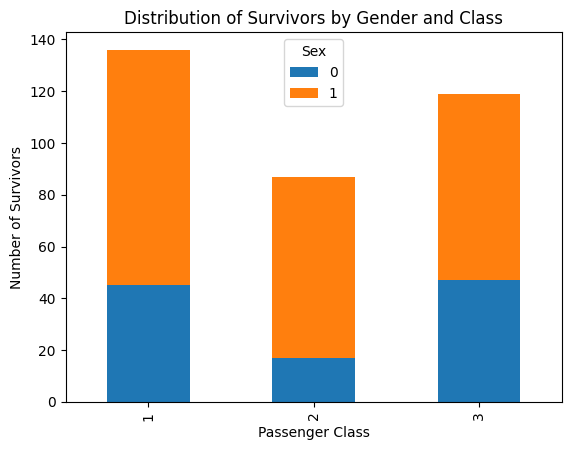

In [18]:
survivors_gender_class = df[df['2urvived'] == 1].groupby(['Pclass', 'Sex']).size().unstack()
survivors_gender_class.plot(kind='bar', stacked=True)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.title('Distribution of Survivors by Gender and Class')
plt.show()

**What is the distribution of the non-survivors among classes that
have relatives aboard the ship**

<ipython-input-30-285921df841c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_survivors_relatives = df[df['sibsp'] + df['Parch'] > 0][df['2urvived'] == 0]['Pclass'].value_counts()


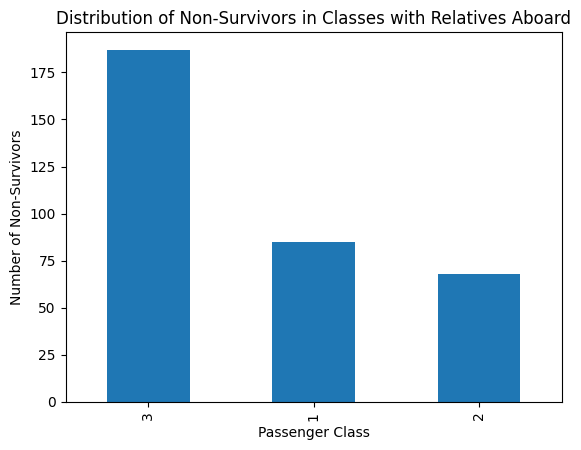

In [30]:

non_survivors_relatives = df[df['sibsp'] + df['Parch'] > 0][df['2urvived'] == 0]['Pclass'].value_counts()
non_survivors_relatives.plot(kind='bar')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Non-Survivors')
plt.title('Distribution of Non-Survivors in Classes with Relatives Aboard')
plt.show()

**What is the survival percentage among different age groups**

In [35]:
import numpy as np
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, np.inf], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
survival_percentage_by_age = df.groupby('AgeGroup')['2urvived'].mean() * 100
print(survival_percentage_by_age)

AgeGroup
Child          42.553191
Teenager       30.303030
Young Adult    21.796760
Adult          29.824561
Senior         23.157895
Name: 2urvived, dtype: float64


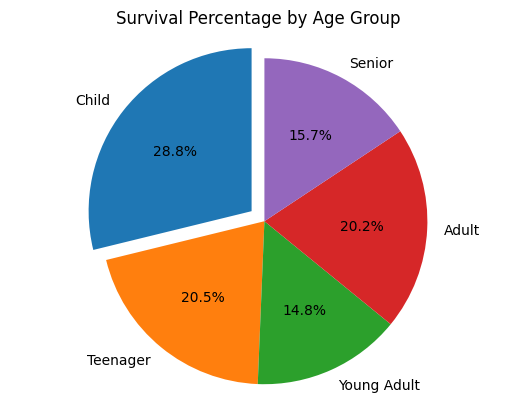

In [46]:
labels = survival_percentage_by_age.index
sizes = survival_percentage_by_age.values
explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Survival Percentage by Age Group')
plt.axis('equal')
plt.show()